# CatBoost

## Default

=== Memulai Pelatihan Model CatBoost (Tanpa Hypertuning) ===

===== Hasil Evaluasi Model CatBoost (Tanpa Hypertuning) =====

Confusion Matrix:
[[949  23]
 [ 43   7]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.23      0.14      0.17        50

    accuracy                           0.94      1022
   macro avg       0.59      0.56      0.57      1022
weighted avg       0.92      0.94      0.93      1022


Skor AUC-ROC: 0.7757


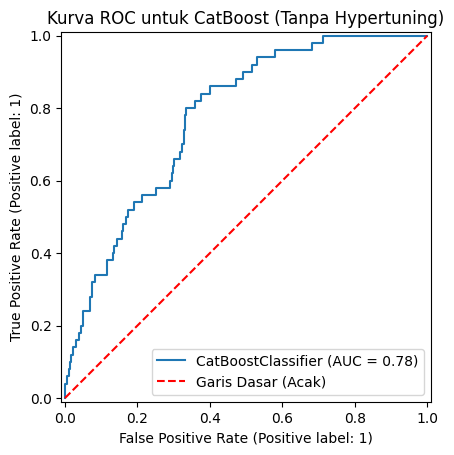

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Latih Model CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 untuk menyembunyikan output pelatihan
print("=== Memulai Pelatihan Model CatBoost (Tanpa Hypertuning) ===")
catboost_model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_catboost = catboost_model.predict(X_test_scaled)
y_pred_proba_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model CatBoost (Tanpa Hypertuning) =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_catboost))
auc_score_catboost = roc_auc_score(y_test, y_pred_proba_catboost)
print(f"\nSkor AUC-ROC: {auc_score_catboost:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(catboost_model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk CatBoost (Tanpa Hypertuning)')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

## Hypertuning

=== Memulai Pelatihan Model CatBoost (Dengan Hypertuning) ===

Parameter Terbaik: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}

===== Hasil Evaluasi Model CatBoost (Dengan Hypertuning) =====

Confusion Matrix:
[[948  24]
 [ 41   9]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       972
           1       0.27      0.18      0.22        50

    accuracy                           0.94      1022
   macro avg       0.62      0.58      0.59      1022
weighted avg       0.92      0.94      0.93      1022


Skor AUC-ROC: 0.7665


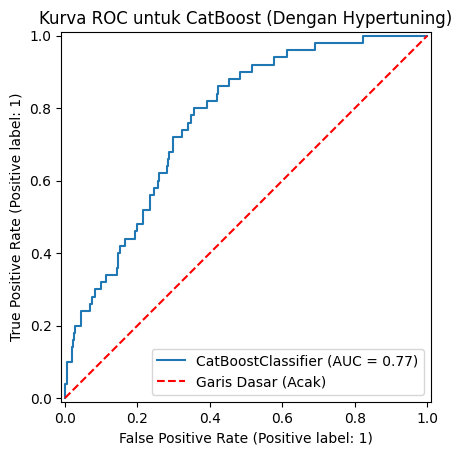

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Tentukan parameter grid untuk hypertuning
param_grid = {
    'iterations': [100, 200],
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6],
    'l2_leaf_reg': [1, 3]
}

# Inisialisasi model CatBoost
catboost_model_tuned = CatBoostClassifier(random_state=42, verbose=0)

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=catboost_model_tuned, param_grid=param_grid, cv=3, scoring='roc_auc', n_jobs=-1)

# Latih model dengan GridSearchCV
print("=== Memulai Pelatihan Model CatBoost (Dengan Hypertuning) ===")
grid_search.fit(X_train_resampled, y_train_resampled)

# Tampilkan parameter terbaik
print(f"\nParameter Terbaik: {grid_search.best_params_}")

# Buat prediksi pada data uji dengan model terbaik
best_catboost_model = grid_search.best_estimator_
y_pred_catboost_tuned = best_catboost_model.predict(X_test_scaled)
y_pred_proba_catboost_tuned = best_catboost_model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model CatBoost (Dengan Hypertuning) =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost_tuned))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_catboost_tuned))
auc_score_catboost_tuned = roc_auc_score(y_test, y_pred_proba_catboost_tuned)
print(f"\nSkor AUC-ROC: {auc_score_catboost_tuned:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(best_catboost_model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk CatBoost (Dengan Hypertuning)')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

## Normalisasi

=== Memulai Pelatihan Model CatBoost (Normalisasi) ===

===== Hasil Evaluasi Model CatBoost (Normalisasi) =====

Confusion Matrix:
[[938  34]
 [ 38  12]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       972
           1       0.26      0.24      0.25        50

    accuracy                           0.93      1022
   macro avg       0.61      0.60      0.61      1022
weighted avg       0.93      0.93      0.93      1022


Skor AUC-ROC: 0.7718


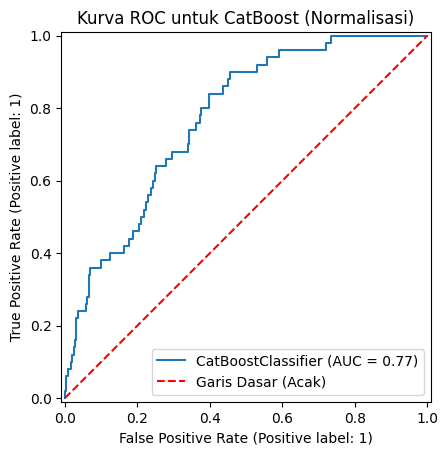

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/healthcare-dataset-stroke-data-encoded.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Penskalaan Fitur
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Latih Model CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 untuk menyembunyikan output pelatihan
print("=== Memulai Pelatihan Model CatBoost (Normalisasi) ===")
catboost_model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_catboost = catboost_model.predict(X_test_scaled)
y_pred_proba_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model CatBoost (Normalisasi) =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_catboost))
auc_score_catboost = roc_auc_score(y_test, y_pred_proba_catboost)
print(f"\nSkor AUC-ROC: {auc_score_catboost:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(catboost_model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk CatBoost (Normalisasi)')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()

## Feature Engineering

=== Memulai Pelatihan Model CatBoost (Feature Engineering) ===

===== Hasil Evaluasi Model CatBoost (Feature Engineering) =====

Confusion Matrix:
[[972   0]
 [  0  50]]

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       972
           1       1.00      1.00      1.00        50

    accuracy                           1.00      1022
   macro avg       1.00      1.00      1.00      1022
weighted avg       1.00      1.00      1.00      1022


Skor AUC-ROC: 1.0000


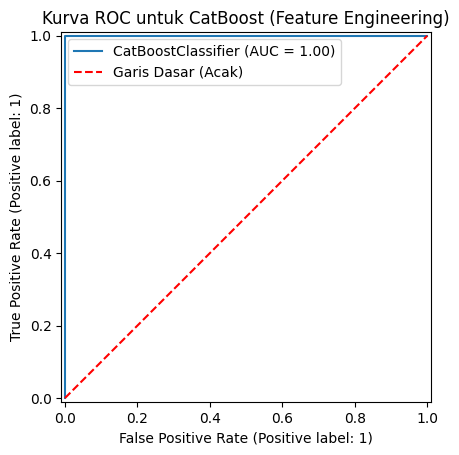

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
import matplotlib.pyplot as plt

# Muat dataset yang sudah di-encode
df = pd.read_csv('data/stroke-data-feat-eng-one-hot.csv')

# Pisahkan fitur (X) dan target (y)
X = df.drop('stroke', axis=1)
y = df['stroke']

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20
                                                    , stratify=y)

# Penskalaan Fitur
caler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Penanganan Kelas Tidak Seimbang (SMOTE)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Latih Model CatBoost
catboost_model = CatBoostClassifier(random_state=42, verbose=0) # verbose=0 untuk menyembunyikan output pelatihan
print("=== Memulai Pelatihan Model CatBoost (Feature Engineering) ===")
catboost_model.fit(X_train_resampled, y_train_resampled)

# Buat prediksi pada data uji
y_pred_catboost = catboost_model.predict(X_test_scaled)
y_pred_proba_catboost = catboost_model.predict_proba(X_test_scaled)[:, 1]

# Tampilkan hasil evaluasi
print("\n===== Hasil Evaluasi Model CatBoost (Feature Engineering) =====")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_catboost))
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_catboost))
auc_score_catboost = roc_auc_score(y_test, y_pred_proba_catboost)
print(f"\nSkor AUC-ROC: {auc_score_catboost:.4f}")

# Visualisasi Kurva ROC
RocCurveDisplay.from_estimator(catboost_model, X_test_scaled, y_test)
plt.title('Kurva ROC untuk CatBoost (Feature Engineering)')
plt.plot([0, 1], [0, 1], 'r--', label='Garis Dasar (Acak)')
plt.legend()
plt.show()